## Predicting Student Success Rate
Used Tutorial for PCA guidance from https://www.jcchouinard.com/pca-with-python/

Steps:
- Visualize and understand data

In [5]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import missingno as msno
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, balanced_accuracy_score

In [6]:
# Read in data and see features
df = pd.read_csv('data.csv', sep=';')
df.head(3)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout


<Axes: >

/Users/alik/opt/miniconda3/envs/ml_hw2/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/Users/alik/opt/miniconda3/envs/ml_hw2/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


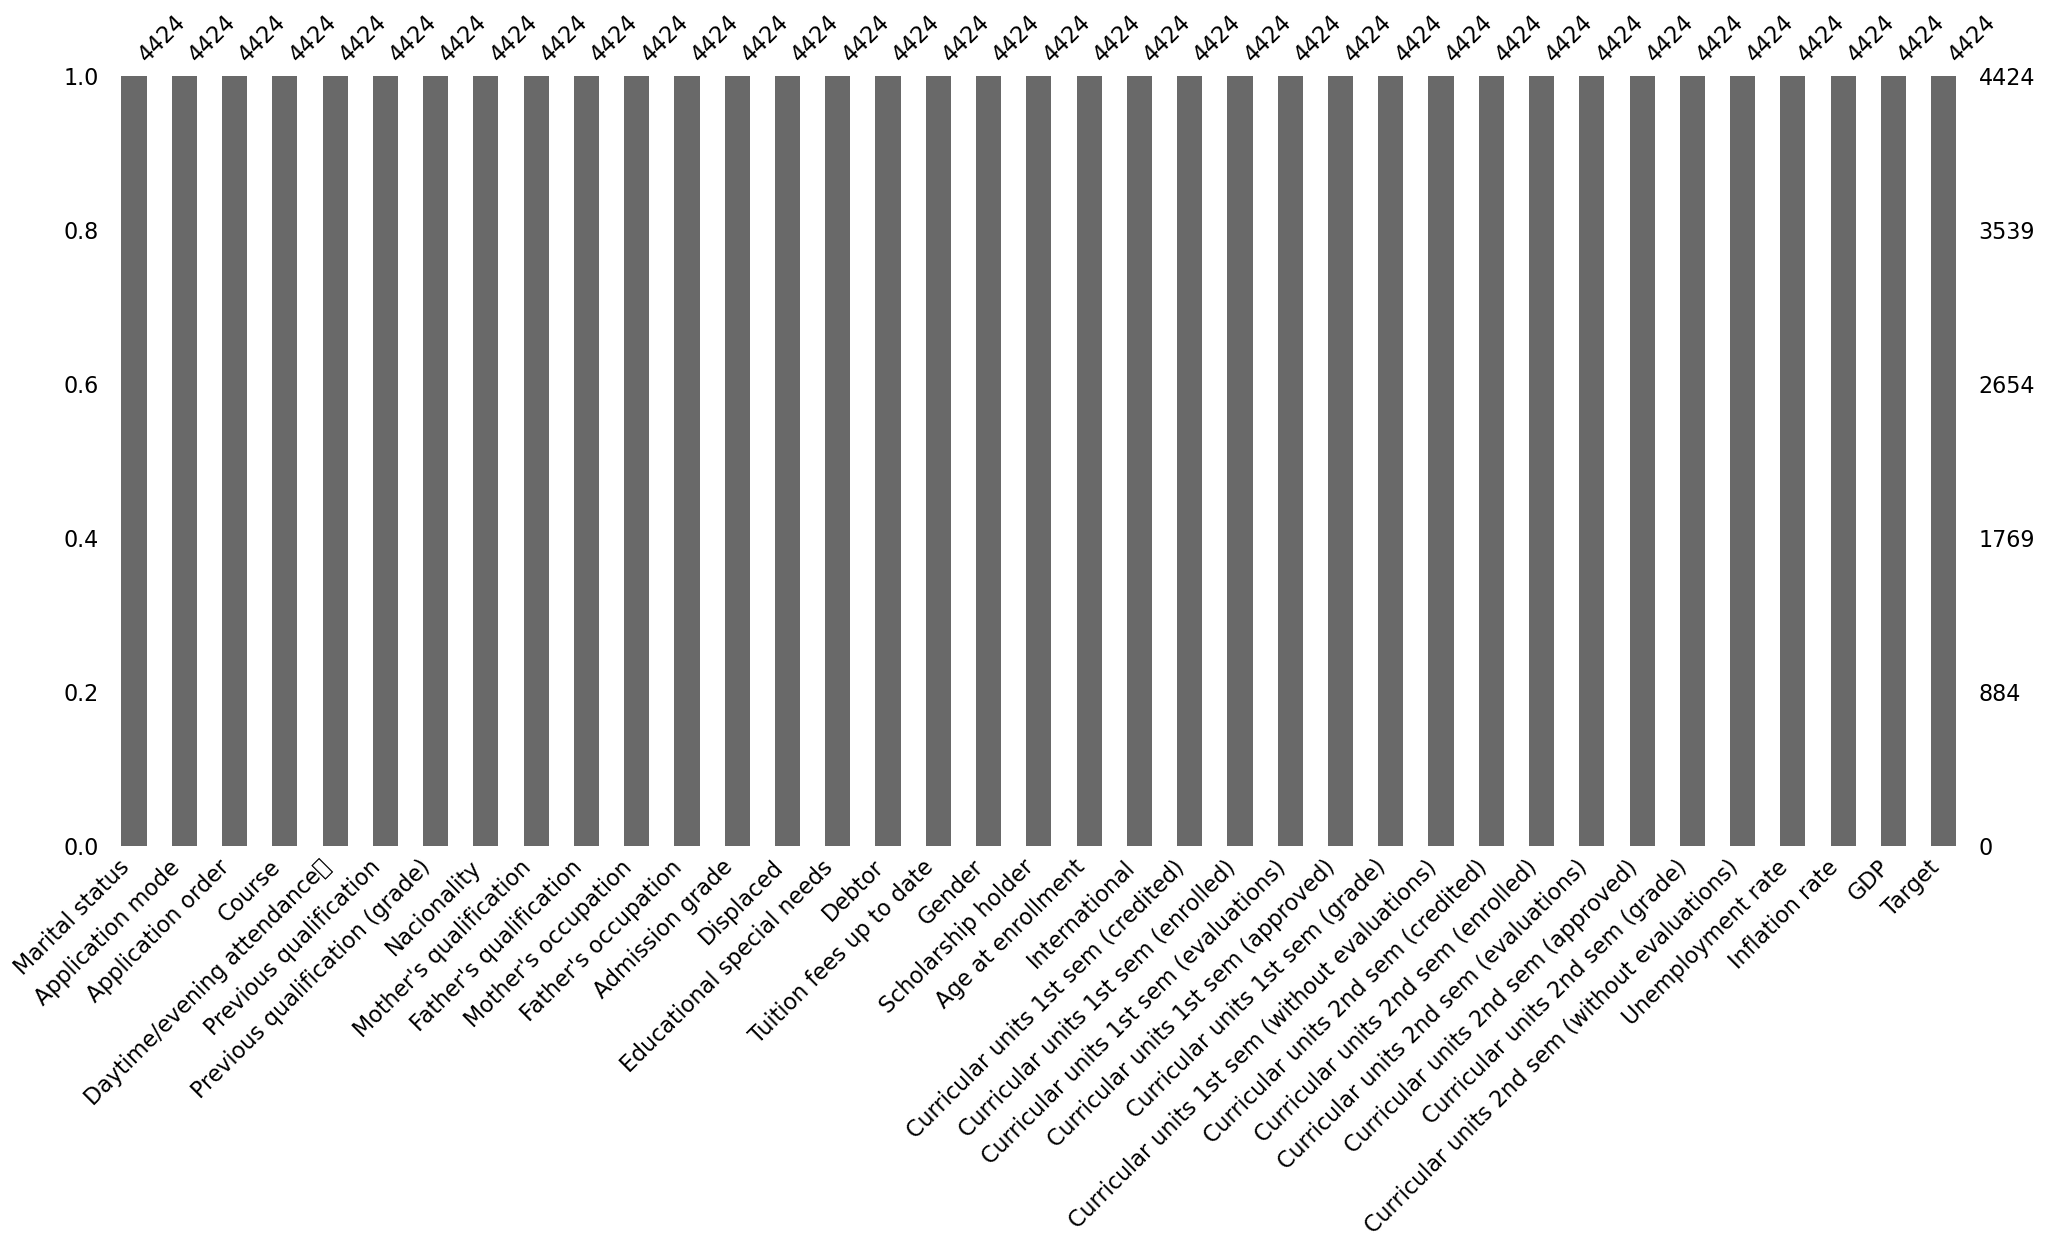

In [11]:
# Missing data detection
msno.bar(df)

We can see that there are no null entries as all the columns are equally populated and there are no missing values for each column.

- Separate data 80/20 for training/testing

In [12]:
n_train = np.floor(0.8*4224).astype(int)
df_arr = df.to_numpy()
train_data = df_arr[0:n_train, :]
test_data = df_arr[n_train:, :]
print('Training Data Points: ', train_data.shape[0])
print('Testing Data Points: ', test_data.shape[0])

Training Data Points:  3379
Testing Data Points:  1045


In [26]:
# Create X matrix and y vector
X = train_data[:, :-1]
X = StandardScaler().fit_transform(X) # Standardizes features with 0 mean and unit variance
y = train_data[:, -1]
display(y)

# Reformat label with dropout as 0 and graduate as 1
target_dict = {'Dropout': 0, 'Graduate': 1, 'Enrolled':1}
target_names = {0:'Dropout', 1:'Graduate or Enrolled'}
target_values = [target_dict[val] for val in y]
print(target_values)
# y = y == "Graduate"
# y = y.astype(int)
# y

array(['Dropout', 'Graduate', 'Dropout', ..., 'Graduate', 'Graduate',
       'Enrolled'], dtype=object)

[0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 


- Next, use Principal Component Analysis (PCA) for dimensionality reduction

    We'll try reducing the 36 original features down to 10

Shape before PCA:  (3379, 36)
Shape after PCA:  (3379, 10)


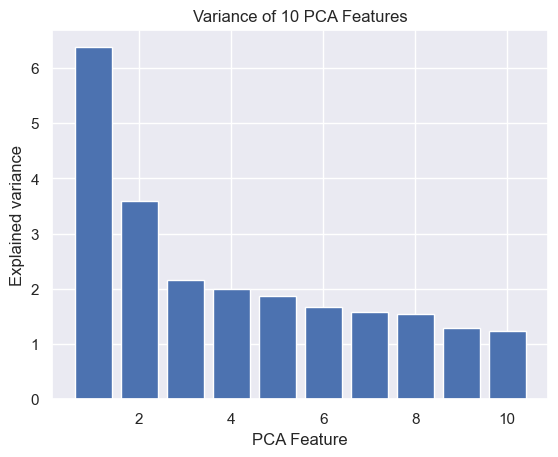

In [27]:
# PCA With 10 Features
pca_10 = decomposition.PCA(n_components=10)
pca_10.fit(X)
X_10 = pca_10.transform(X)
print('Shape before PCA: ', X.shape)
print('Shape after PCA: ', X_10.shape)

# Determine variance of the 10 Principal Components (PCs) created by PCA
pca_10.explained_variance_
plt.bar(range(1, len(pca_10.explained_variance_) + 1), pca_10.explained_variance_)
plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Variance of 10 PCA Features')
plt.show()

From this, we can see that the first 2 features seem to be the most informative, so let's perform PCA with 2 features

In [28]:
# PCA With 2 Features
pca_2 = decomposition.PCA(n_components=2)
pca_2.fit(X)
X_2 = pca_2.transform(X)
print('Shape before PCA: ', X.shape)
print('Shape after PCA: ', X_2.shape)

Shape before PCA:  (3379, 36)
Shape after PCA:  (3379, 2)


Now lets plot the data after PCA

           PC1       PC2                target
0    -6.130470 -0.228336               Dropout
1    -0.229564 -1.095422  Graduate or Enrolled
2    -3.956740  0.474904               Dropout
3     0.441240 -0.955056  Graduate or Enrolled
4     0.416297  2.760935  Graduate or Enrolled
...        ...       ...                   ...
3374  0.035069 -1.655052  Graduate or Enrolled
3375  1.255392  0.396871  Graduate or Enrolled
3376  0.414904 -1.667422  Graduate or Enrolled
3377  0.807560 -1.160796  Graduate or Enrolled
3378 -0.659505 -0.328281  Graduate or Enrolled

[3379 rows x 3 columns]


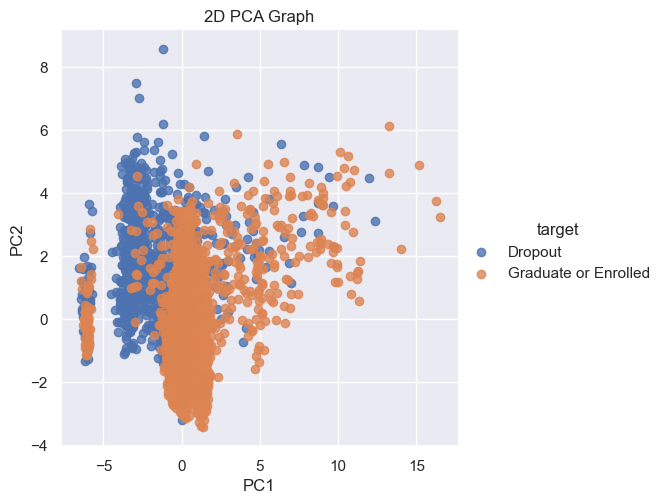

In [29]:
sns.set()
pca_df = pd.DataFrame(data=X_2, columns=['PC1', 'PC2'])
pca_df['target'] = target_values
pca_df['target'] = pca_df['target'].map(target_names)
print(pca_df)
sns.lmplot(x='PC1', y='PC2', data=pca_df, hue='target', fit_reg=False, legend=True)
 
plt.title('2D PCA Graph')
plt.show()

Let's see how different features are being taken into account with each principal component

In [30]:
# Principal components correlation coefficients
comps = pca_2.components_
 
# Number of features before PCA
n_features = pca_2.n_features_
 
# Feature names before PCA
feature_names = df.columns[:-1]
 
# PC names
pc_list = [f'PC{i}' for i in list(range(1, n_features + 1))]
 
# Match PC names to loadings
pc_loadings = dict(zip(pc_list, comps))
 
# Matrix of corr coefs between feature names and PCs
loadings_df = pd.DataFrame.from_dict(pc_loadings)
loadings_df['feature_names'] = feature_names
loadings_df = loadings_df.set_index('feature_names')
loadings_df

/Users/alik/opt/miniconda3/envs/ml_hw2/lib/python3.10/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


,PC1,PC2
feature_names,,
Marital status,0.017437,0.251320
Application mode,0.062687,0.358240
Application order,-0.015585,-0.224449
Course,0.136009,-0.043103
Daytime/evening attendance\t,-0.014399,-0.252855
Previous qualification,0.054957,0.172168
Previous qualification (grade),-0.007507,-0.066955
Nacionality,-0.011275,-0.005936
Mother's qualification,0.012825,0.160853


In [31]:
pca_30 = decomposition.PCA(n_components=30)
pca_30.fit(X)
X_30 = pca_30.transform(X)

In [32]:
clf = LogisticRegression()
clf.fit(X_30, target_)

LogisticRegression()

In [33]:
X_test = test_data[:, :-1]
X_test = StandardScaler().fit_transform(X_test)
X_test_30 = pca_30.transform(X_test)
y_test = test_data[:, -1]
target_names = {0:'Dropout', 1:'Graduate'}
y_test = y_test == "Graduate"
y_test = y_test.astype(int)
y_pred = clf.predict(X_test_30)

In [34]:
accuracy = balanced_accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Confusion matrix:")
print(conf_matrix)

ValueError: Mix of label input types (string and number)